In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\jiten'

In [5]:
os.listdir(r'C:\Users\jiten\Desktop\ExcelR\Data Science assignment\4 Simple Linear Regression')

['Anjali DS Assignment 4.ipynb',
 'delivery_time.csv',
 'Problem_statements.txt',
 'Salary_Data.csv']

In [6]:
os.chdir(r'C:\Users\jiten\Desktop\ExcelR\Data Science assignment\4 Simple Linear Regression')

# Q1) Delivery_time -> Predict delivery time using sorting time

In [64]:
dataset=pd.read_csv( 'delivery_time.csv')
dataset

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [65]:
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [66]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [67]:
dataset.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [68]:
data=dataset.rename({'Delivery Time':'d_time', 'Sorting Time':'sort_time'},axis=1)
data

,d_time,sort_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [69]:
from scipy.stats import skew
print(skew(data.d_time))

0.326702631656106


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='d_time'>

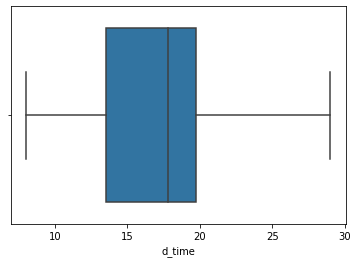

In [70]:
sns.boxplot(data['d_time'], orient = 'h')

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='d_time', ylabel='Density'>

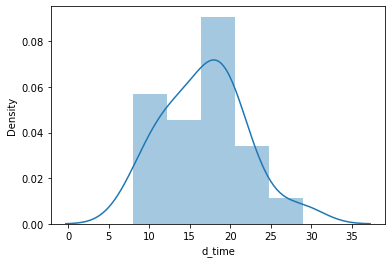

In [71]:
sns.distplot(data['d_time'])

In [72]:
print(skew(data.sort_time))

0.043680994983108075


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sort_time'>

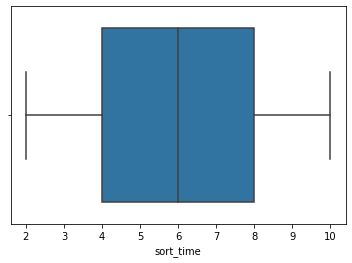

In [73]:
sns.boxplot(data['sort_time'], orient='h')

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sort_time', ylabel='Density'>

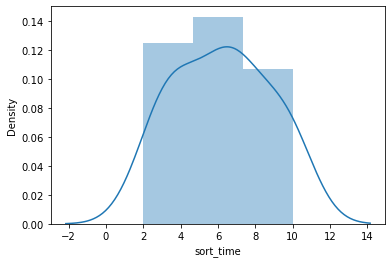

In [74]:
sns.distplot(data['sort_time'])

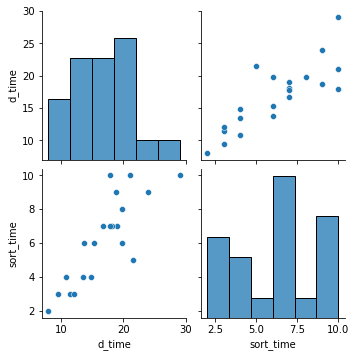

In [75]:
sns.pairplot(data)

# Correlation Analysis

In [76]:
data.corr()

,d_time,sort_time
d_time,1.000000,0.825997
sort_time,0.825997,1.000000


<AxesSubplot:>

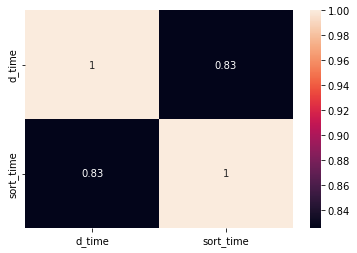

In [77]:
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='sort_time', ylabel='d_time'>

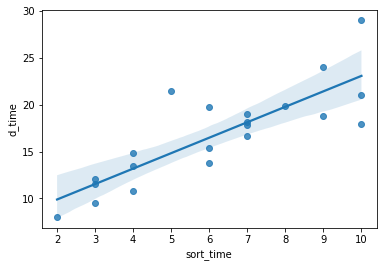

In [78]:
sns.regplot(x=data['sort_time'],y=data['d_time'])

# Model Building

In [79]:
model1=smf.ols("d_time~sort_time",data=data).fit()

Text(0.5, 0, 'log(sort_time)')

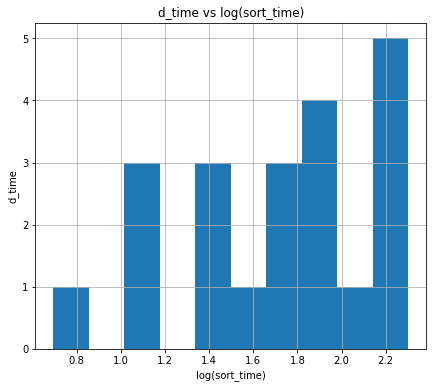

In [80]:
data['log_sort_time']=np.log(data['sort_time'])
data.hist('log_sort_time',figsize=(7,6))
plt.title('d_time vs log(sort_time)')
plt.ylabel('d_time')
plt.xlabel("log(sort_time)")

Text(0.5, 0, 'sqrt(sort_time)')

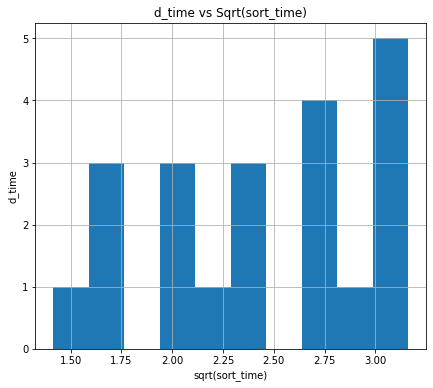

In [81]:
data['log_sort_time']=np.sqrt(data['sort_time'])
data.hist('log_sort_time',figsize=(7,6))
plt.title('d_time vs Sqrt(sort_time)')
plt.ylabel('d_time')
plt.xlabel("sqrt(sort_time)")

Text(0.5, 0, 'sqrt(sort_time)')

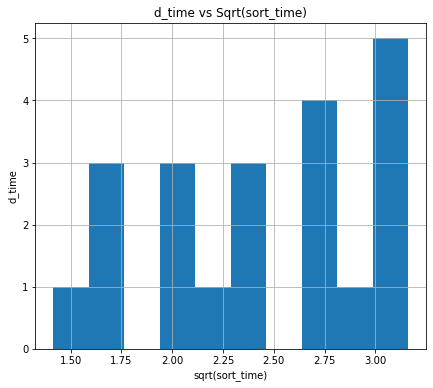

In [82]:
data['log_sort_time']=np.sqrt(data['sort_time'])
data.hist('log_sort_time',figsize=(7,6))
plt.title('d_time vs Sqrt(sort_time)')
plt.ylabel('d_time')
plt.xlabel("sqrt(sort_time)")

# Model Testing

In [83]:
model1.params

Intercept    6.582734
sort_time    1.649020
dtype: float64

In [84]:
model1.tvalues , model1.pvalues

(Intercept    3.823349
 sort_time    6.387447
 dtype: float64,
 Intercept    0.001147
 sort_time    0.000004
 dtype: float64)

In [85]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 d_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        11:38:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
sort_time      1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
model1.rsquared , model1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [87]:
d_time = (6.582734) + (1.649020)*(6)
d_time

16.476854

In [88]:
new_data=pd.Series([6,8])
new_data

0    6
1    8
dtype: int64

In [89]:
data_pred=pd.DataFrame(new_data,columns=['sort_time'])
data_pred

,sort_time
0,6
1,8


In [90]:
model1.predict(data_pred)

0    16.476853
1    19.774893
dtype: float64

# Q2) Salary_hike -> Build a prediction model for Salary_hike

In [91]:
data2=pd.read_csv('Salary_Data.csv')
data2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [92]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [93]:
data2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [94]:
d=data2.rename({'YearsExperience':'Y_Exp', 'Salary':'salary'},axis=1)
d

,Y_Exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [96]:
from scipy.stats import skew
print(skew(d.Y_Exp))

0.3603123252525561


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y_Exp'>

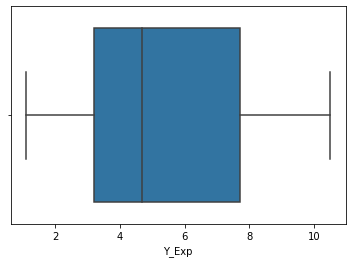

In [97]:
sns.boxplot(d['Y_Exp'], orient = 'h')

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y_Exp', ylabel='Density'>

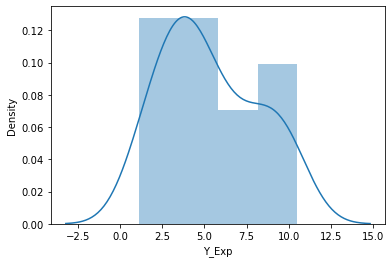

In [98]:
sns.distplot(d['Y_Exp'])

In [99]:
print(skew(d.salary))

0.3361618825592921


C:\Users\jiten\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

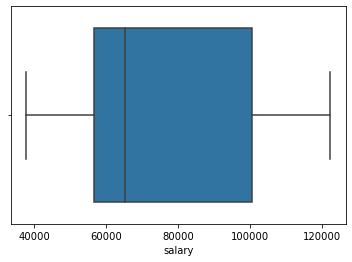

In [100]:
sns.boxplot(d['salary'], orient='h')

C:\Users\jiten\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

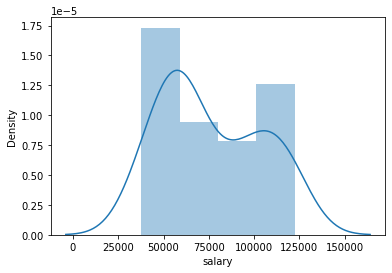

In [101]:
sns.distplot(d['salary'])

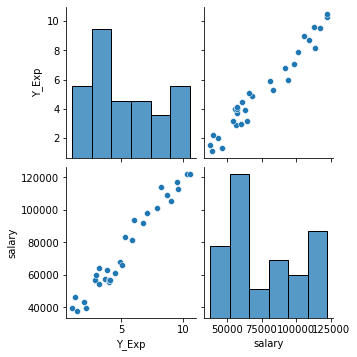

In [102]:
sns.pairplot(d)

# Correlation Analysis

In [103]:
d.corr()

,Y_Exp,salary
Y_Exp,1.000000,0.978242
salary,0.978242,1.000000


<AxesSubplot:>

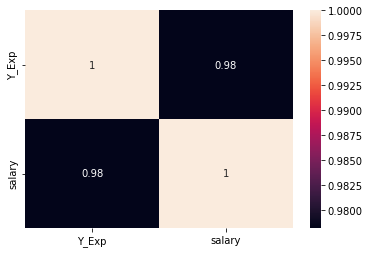

In [104]:
sns.heatmap(d.corr(), annot=True)

<AxesSubplot:xlabel='Y_Exp', ylabel='salary'>

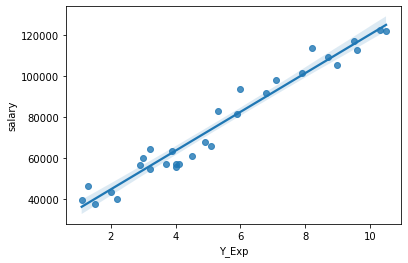

In [107]:
sns.regplot(x=d['Y_Exp'],y=d['salary'])

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

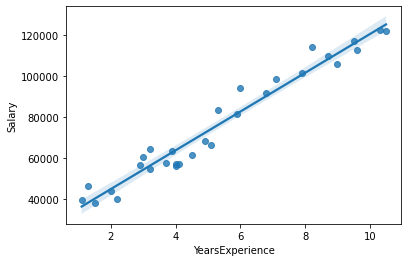

In [109]:
sns.regplot(x=data2['YearsExperience'],y=data2['Salary'])

# Model Building

In [111]:
model2=smf.ols("Salary~YearsExperience",data=data2).fit()

Text(0.5, 0, 'log(YearsExperience)')

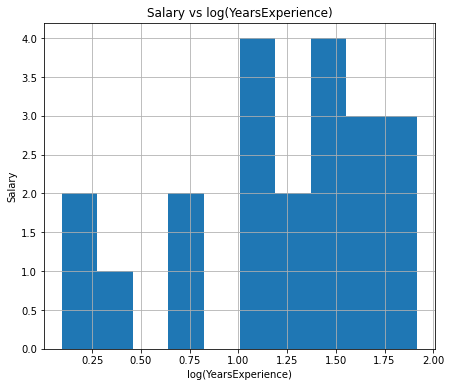

In [112]:
data['log_YearsExperience']=np.log(data2['YearsExperience'])
data.hist('log_YearsExperience',figsize=(7,6))
plt.title('Salary vs log(YearsExperience)')
plt.ylabel('Salary')
plt.xlabel("log(YearsExperience)")

Text(0.5, 0, 'sqrt(YearsExperience)')

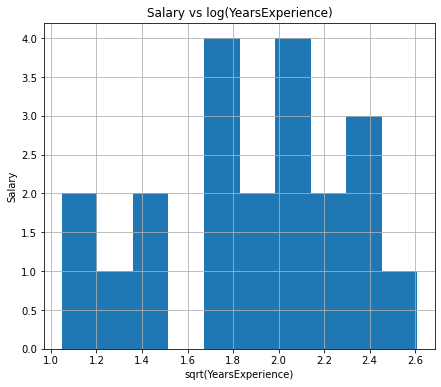

In [113]:
data['log_YearsExperience']=np.sqrt(data2['YearsExperience'])
data.hist('log_YearsExperience',figsize=(7,6))
plt.title('Salary vs log(YearsExperience)')
plt.ylabel('Salary')
plt.xlabel("sqrt(YearsExperience)")

Text(0.5, 0, 'cbrt(YearsExperience)')

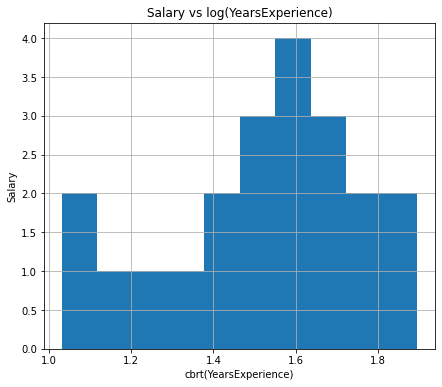

In [114]:
data['log_YearsExperience']=np.cbrt(data2['YearsExperience'])
data.hist('log_YearsExperience',figsize=(7,6))
plt.title('Salary vs log(YearsExperience)')
plt.ylabel('Salary')
plt.xlabel("cbrt(YearsExperience)")

# Model Testing

In [115]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [116]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        11:47:23   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
model2.tvalues,model2.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [118]:
model2.rsquared , model2.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [119]:
model2=smf.ols("Salary~np.square(YearsExperience)",data=data2).fit()

# Model Prediction

In [120]:
Salary=(25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [121]:
new_data=pd.Series([2,6])
new_data

0    2
1    6
dtype: int64

In [122]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,2
1,6


In [123]:
model2.predict(data_pred)

0    51147.860608
1    75990.061354
dtype: float64